In [34]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [35]:
image1 = cv.imread("./dataset/resized/BASOPHIL_resized.png")
image2 = cv.imread("./dataset/resized/EOSINOPHIL_resized.png")
image3 = cv.imread("./dataset/resized/LYMPHOCYTE_resized.png")
image4 = cv.imread("./dataset/resized/MONOCYTE_resized.png")
image5 = cv.imread("./dataset/resized/NEUTROPHIL_resized.png")


In [36]:
color_segmented_image1 = cv.imread("./dataset/color_segmented/BASOPHIL.png")
color_segmented_image2 = cv.imread("./dataset/color_segmented/EOSINOPHIL.png")
color_segmented_image3 = cv.imread("./dataset/color_segmented/LYMPHOCYTE.png")
color_segmented_image4 = cv.imread("./dataset/color_segmented/MONOCYTE.png")
color_segmented_image5 = cv.imread("./dataset/color_segmented/NEUTROPHIL.png")

color_segmented_image1_gray= cv.cvtColor(color_segmented_image1, cv.COLOR_BGR2GRAY)
color_segmented_image2_gray= cv.cvtColor(color_segmented_image2, cv.COLOR_BGR2GRAY)
color_segmented_image3_gray= cv.cvtColor(color_segmented_image3, cv.COLOR_BGR2GRAY)
color_segmented_image4_gray= cv.cvtColor(color_segmented_image4, cv.COLOR_BGR2GRAY)
color_segmented_image5_gray= cv.cvtColor(color_segmented_image5, cv.COLOR_BGR2GRAY)


In [37]:
def show_img5(w, h, citra1, citra2, citra3, citra4, citra5, caption1, caption2, caption3, caption4, caption5):  
    #memanggil fungsi figure dengan lebar dan tinggi mengikuti ukuran w dan h
    plt.figure(figsize=(w,h))
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-1
    plt.subplot(1,5,1)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption1, fontsize=14, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra1, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-2
    plt.subplot(1,5,2)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption2, fontsize=14, color="green")
    #menampilkan gambar
    plt.imshow(citra2, cmap="gray")
    plt.subplot(1,5,3)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption3, fontsize=14, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra3, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-2
    plt.subplot(1,5,4)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption4, fontsize=14, color="green")
    #menampilkan gambar
    plt.imshow(citra4, cmap="gray")
    plt.subplot(1,5,5)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption5, fontsize=14, color="green")
    #menampilkan gambar
    plt.imshow(citra5, cmap="gray")

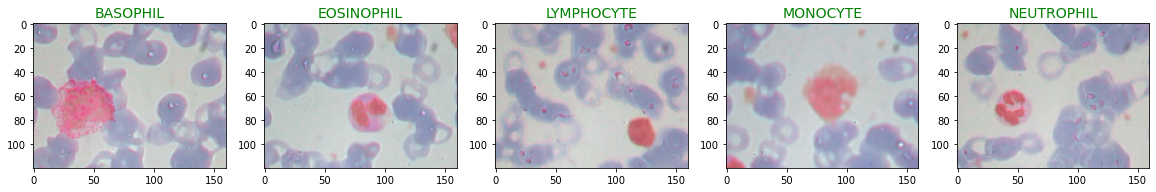

In [38]:
show_img5(20,20, image1, image2, image3, image4, image5, "BASOPHIL", "EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL")

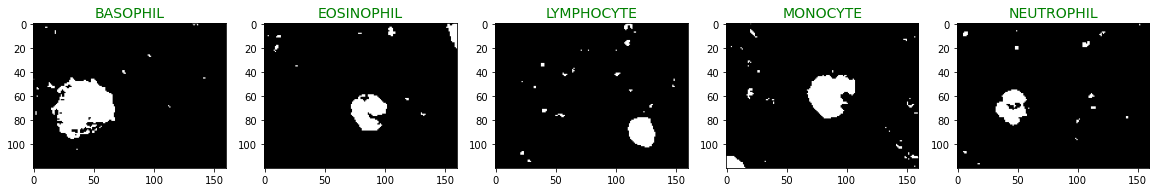

In [39]:
show_img5(20,20, color_segmented_image1, color_segmented_image2, color_segmented_image3, color_segmented_image4, color_segmented_image5, "BASOPHIL", "EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL")

In [40]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7)) #kernel structuring element berbentuk elips berukuran 7x7

In [41]:
bar,kol = color_segmented_image1_gray.shape #berfungsi sebagai ukuran dari citra

In [42]:
#fungsi untuk menambahkan padding untuk citra
def padding (citra,banyak_pad):
    citpad=np.pad(citra,(banyak_pad,banyak_pad),mode='symmetric')
    return citpad

In [43]:
#fungsi untuk Erosi
def eros (c):   
    hasil = np.zeros (c.shape) #berfungsi untuk membuat matriks nol untuk menampung citra baru 
    for i in range(bar): #melakukan perulangan i sebanayak baris dari citra
        for j in range(kol):  #melakukan perulangan i sebanayak kolom dari citra
            if((c[i,j] == 0) or (c[i,j+1] == 0) or (c[i,j+2] == 0) or (c[i+1,j] == 0) or (c[i+1,j+1] == 0) or (c[i+1,j+2] == 0) or (c[i+2,j] == 0) or (c[i+2,j+1] == 0) or (c[i+2,j+2] == 0)):
                hasil[i,j] = hasil[i,j+1] = hasil[i,j+2] = hasil[i+1,j] = hasil[i+1,j+1] = hasil[i+1,j+2] = hasil[i+2,j] = hasil[i+2,j+1] = hasil[i+2,j+2] = 0
            else:
                hasil[i,j] = c[i,j]
                
    return hasil #mengembalikan nilai hasil

In [44]:
#Fungsi untuk Dilasi
def dil (c):   
    hasil = np.zeros (c.shape) #berfungsi untuk membuat matriks nol untuk menampung citra baru 
    for i in range(bar): #melakukan perulangan i sebanayak baris dari citra
        for j in range(kol):  #melakukan perulangan i sebanayak kolom dari citra
            if(c[i,j]==1):
                hasil[i,j] = hasil[i,j+1] = hasil[i,j+2] = hasil[i+1,j] = hasil[i+1,j+1] = hasil[i+1,j+2] = hasil[i+2,j] = hasil[i+2,j+1] = hasil[i+2,j+2] = 1
            elif(hasil[i,j]==1):
                hasil[i,j] = hasil[i,j]
            else:
                hasil[i,j] = c[i,j]
    return hasil #mengembalikan nilai hasil

In [48]:
#hasil Erosi
p1 = padding(color_segmented_image1_gray,2)
p2 = padding(color_segmented_image2_gray,2)
p3 = padding(color_segmented_image3_gray,2)
p4 = padding(color_segmented_image4_gray,2)
p5 = padding(color_segmented_image5_gray,2)
erosi1=eros(p1)
erosi2=eros(p2)
erosi3=eros(p3)
erosi4=eros(p4)
erosi5=eros(p5)

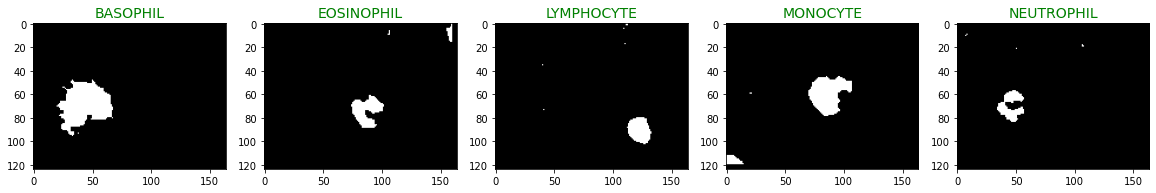

In [52]:
show_img5(20,20, erosi1, erosi2, erosi3, erosi4, erosi5, "BASOPHIL", "EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL")

In [49]:
#Hasil Dilasi
p1 = padding(color_segmented_image1_gray,2)
p2 = padding(color_segmented_image2_gray,2)
p3 = padding(color_segmented_image3_gray,2)
p4 = padding(color_segmented_image4_gray,2)
p5 = padding(color_segmented_image5_gray,2)
dilasi1=dil(p1)
dilasi2=dil(p2)
dilasi3=dil(p3)
dilasi4=dil(p4)
dilasi5=dil(p5)

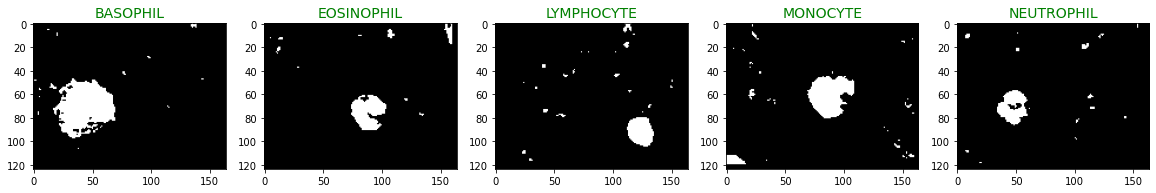

In [53]:
show_img5(20,20, dilasi1, dilasi2, dilasi3, dilasi4, dilasi5, "BASOPHIL", "EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL")

(Text(0.5, 1.0, 'NEUTROPHIL'), ([], []), ([], []))

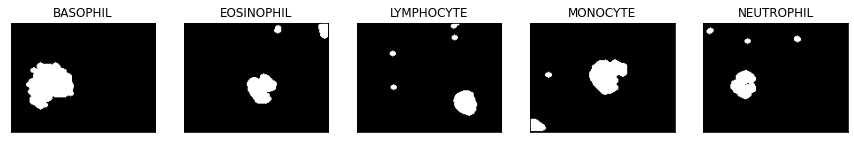

In [50]:
# Hasil Opening
plt.figure(figsize=(15,15))
plt.subplot(151), plt.imshow(cv.dilate(erosi1, kernel, iterations = 1), cmap = "gray")
plt.title('BASOPHIL'), plt.xticks([]), plt.yticks([])

plt.subplot(152), plt.imshow(cv.dilate(erosi2, kernel, iterations = 1), cmap = "gray")
plt.title('EOSINOPHIL'), plt.xticks([]), plt.yticks([])

plt.subplot(153), plt.imshow(cv.dilate(erosi3, kernel, iterations = 1), cmap = "gray")
plt.title('LYMPHOCYTE'), plt.xticks([]), plt.yticks([])

plt.subplot(154), plt.imshow(cv.dilate(erosi4, kernel, iterations = 1), cmap = "gray")
plt.title('MONOCYTE'), plt.xticks([]), plt.yticks([])

plt.subplot(155), plt.imshow(cv.dilate(erosi5, kernel, iterations = 1), cmap = "gray")
plt.title('NEUTROPHIL'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'NEUTROPHIL'), ([], []), ([], []))

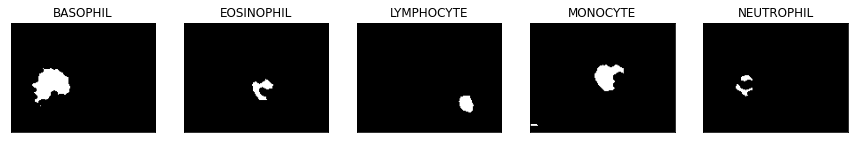

In [51]:
# Hasil Closing
plt.figure(figsize=(15,15))
plt.subplot(151), plt.imshow(cv.erode(dilasi1, kernel, iterations = 1), cmap = "gray")
plt.title('BASOPHIL'), plt.xticks([]), plt.yticks([])

plt.subplot(152), plt.imshow(cv.erode(dilasi2, kernel, iterations = 1), cmap = "gray")
plt.title('EOSINOPHIL'), plt.xticks([]), plt.yticks([])

plt.subplot(153), plt.imshow(cv.erode(dilasi3, kernel, iterations = 1), cmap = "gray")
plt.title('LYMPHOCYTE'), plt.xticks([]), plt.yticks([])

plt.subplot(154), plt.imshow(cv.erode(dilasi4, kernel, iterations = 1), cmap = "gray")
plt.title('MONOCYTE'), plt.xticks([]), plt.yticks([])

plt.subplot(155), plt.imshow(cv.erode(dilasi5, kernel, iterations = 1), cmap = "gray")
plt.title('NEUTROPHIL'), plt.xticks([]), plt.yticks([])